In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
from glob import glob
import numpy as np

from scipy.ndimage import gaussian_filter1d as smooth

# DCS

In [2]:
np.random.seed(0)

region = 'itc'

data = {'itc': {'fac': [], 'bod': [], 'art': [], 'nat': [], 'fac0': [], 'bod0': [], 'art0': [], 'nat0': []},
        'pfc': {'fac': [], 'bod': [], 'art': [], 'nat': [], 'fac0': [], 'bod0': [], 'art0': [], 'nat0': []}}

directory = 'G:\Results\SUA\dec\c-ovr-final\classification'
# directory = 'G:\Results\SUA\dec\c-ovr-final-main\both-fast'
for fname in glob(f'{directory}\c-ovr-r-*-dpr.pickle'):
    with open(fname, 'rb') as handler:
        dpr = pickle.load(handler)

    for region in ['itc', 'pfc']:
        for category in ['fac', 'bod', 'art', 'nat']:
            # data[region][category].append(np.mean(dpr[region][category], 0))
            X = dpr[region][category]
            data[region][category].append(X[np.random.choice(np.shape(X)[0])])

for fname in glob(f'{directory}\c-ovr-p-*-dpr.pickle'):
    with open(fname, 'rb') as handler:
        dpr = pickle.load(handler)

    for region in ['itc', 'pfc']:
        for category in ['fac', 'bod', 'art', 'nat']:
            # data[region][category+"0"].append(np.mean(dpr[region][category], 0))
            X = dpr[region][category]
            data[region][category+"0"].append(X[np.random.choice(np.shape(X)[0])])

for region in ['itc', 'pfc']:
    for key in data[region].keys():
        data[region][key] = np.array(data[region][key])

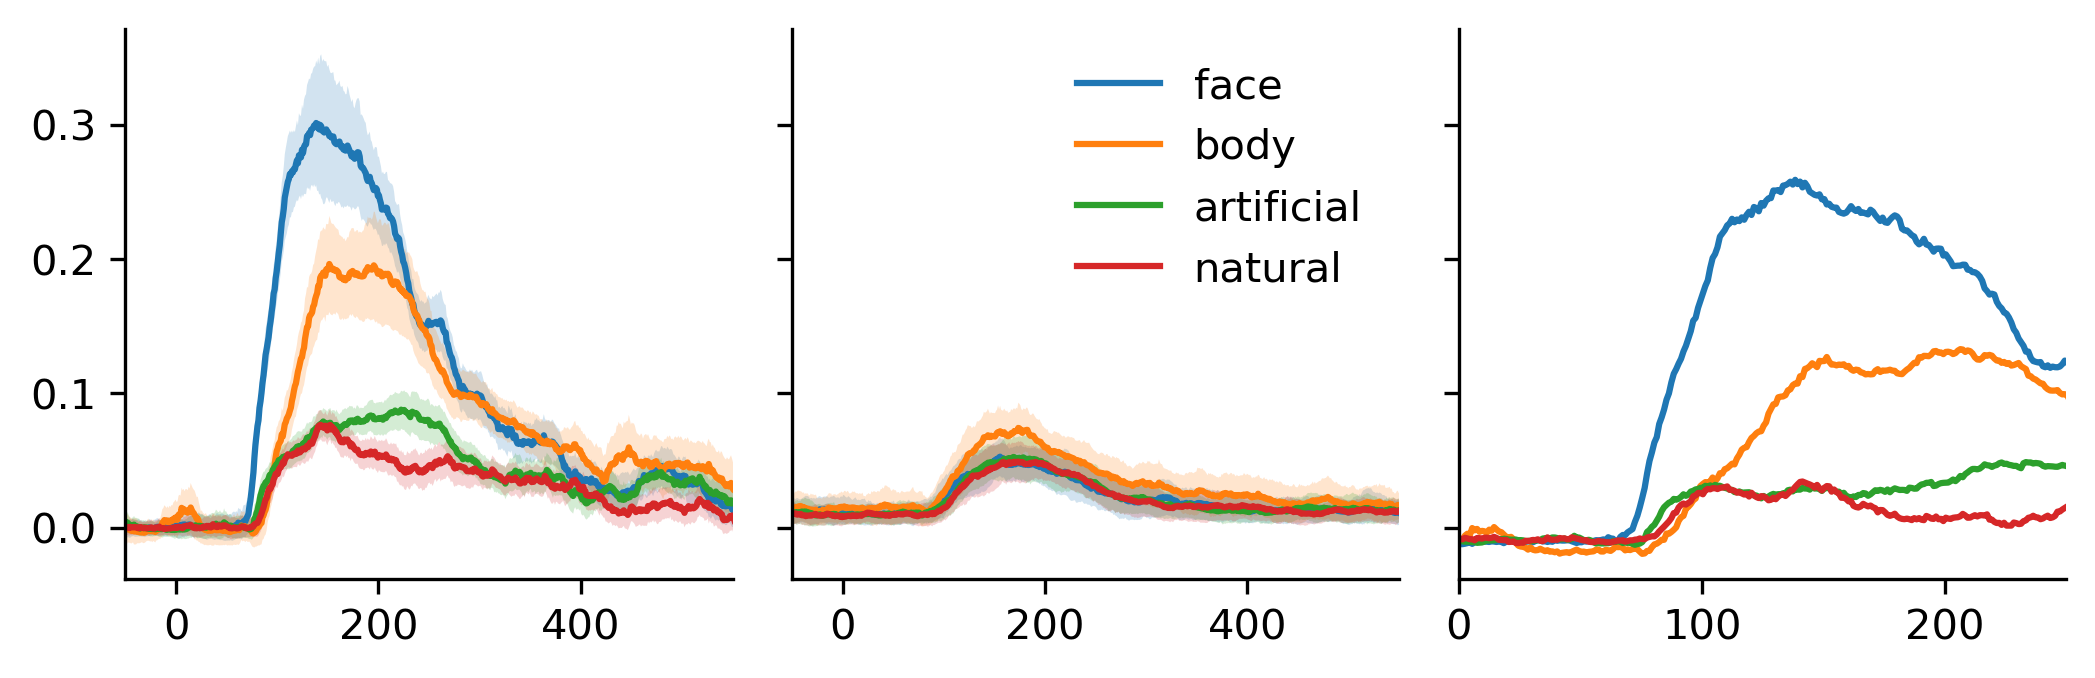

In [3]:
cm = 1 / 2.54
tim = np.arange(-200, 675) + 12.5
fig, axs = plt.subplots(1, 3, figsize=(18 * cm, 6 * cm), dpi=300, sharey=True)

region = 'itc'
for category in ['fac', 'bod', 'art', 'nat']:
    m = np.array(data[region][category])
    m0 = np.array(data[region][category+"0"])

    m -= m[:, (tim > -50) & (tim < 0)].mean(1).reshape(-1, 1)
    # m = smooth(m, sigma=3)
    
    axs[0].plot(tim, m.mean(0))
    axs[0].fill_between(tim, m.mean(0) + m.std(0), m.mean(0) - m.std(0), alpha=.2, label='_nolegend_')

    axs[1].plot(tim, m0.mean(0))
    axs[1].fill_between(tim, m0.mean(0) + m0.std(0), m0.mean(0) - m0.std(0), alpha=.2, label='_nolegend_')

    axs[2].plot(tim, m.mean(0) - m0.mean(0))


for ax in axs:
    ax.set_xlim(-50, 550)
axs[2].set_xlim(0, 250)
axs[1].legend(['face', 'body', 'artificial', 'natural'], frameon=False)
sns.despine()
fig.tight_layout()

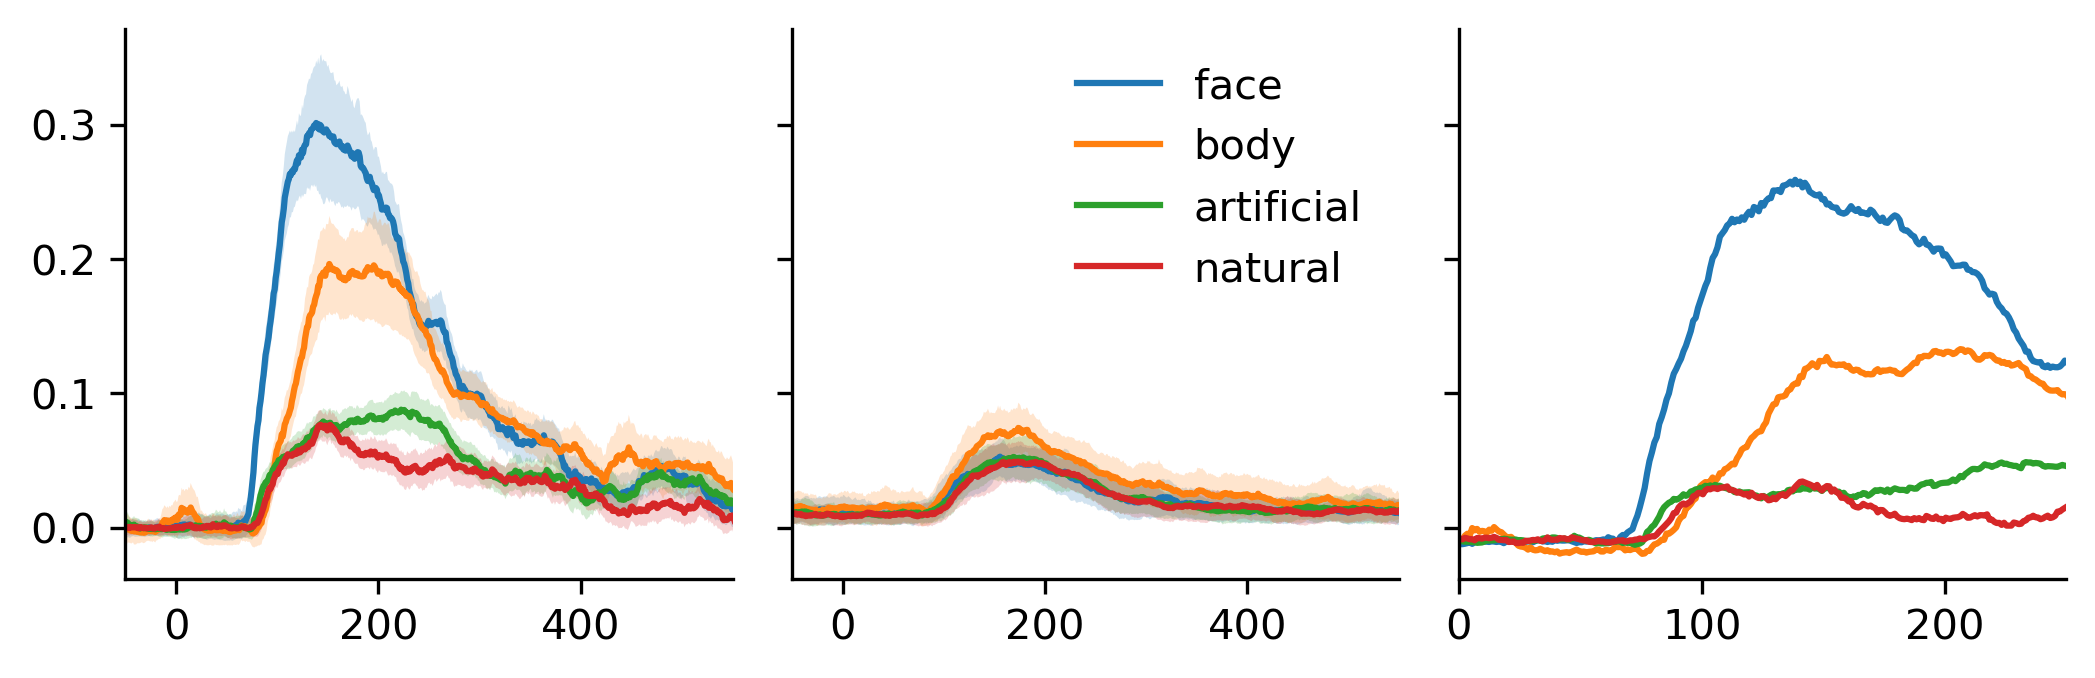

In [4]:
cm = 1 / 2.54
tim = np.arange(-200, 675) + 12.5
fig, axs = plt.subplots(1, 3, figsize=(18 * cm, 6 * cm), dpi=300, sharey=True)

region = 'itc'
for category in ['fac', 'bod', 'art', 'nat']:
    m = np.array(data[region][category])
    m0 = np.array(data[region][category+"0"])

    m -= m[:, (tim > -50) & (tim < 0)].mean(1).reshape(-1, 1)
    # m = smooth(m, sigma=3)
    
    axs[0].plot(tim, m.mean(0))
    axs[0].fill_between(tim, m.mean(0) + m.std(0), m.mean(0) - m.std(0), alpha=.2, label='_nolegend_')

    axs[1].plot(tim, m0.mean(0))
    axs[1].fill_between(tim, m0.mean(0) + m0.std(0), m0.mean(0) - m0.std(0), alpha=.2, label='_nolegend_')

    axs[2].plot(tim, m.mean(0) - m0.mean(0))


for ax in axs:
    ax.set_xlim(-50, 550)
axs[2].set_xlim(0, 250)
axs[1].legend(['face', 'body', 'artificial', 'natural'], frameon=False)
sns.despine()
fig.tight_layout()

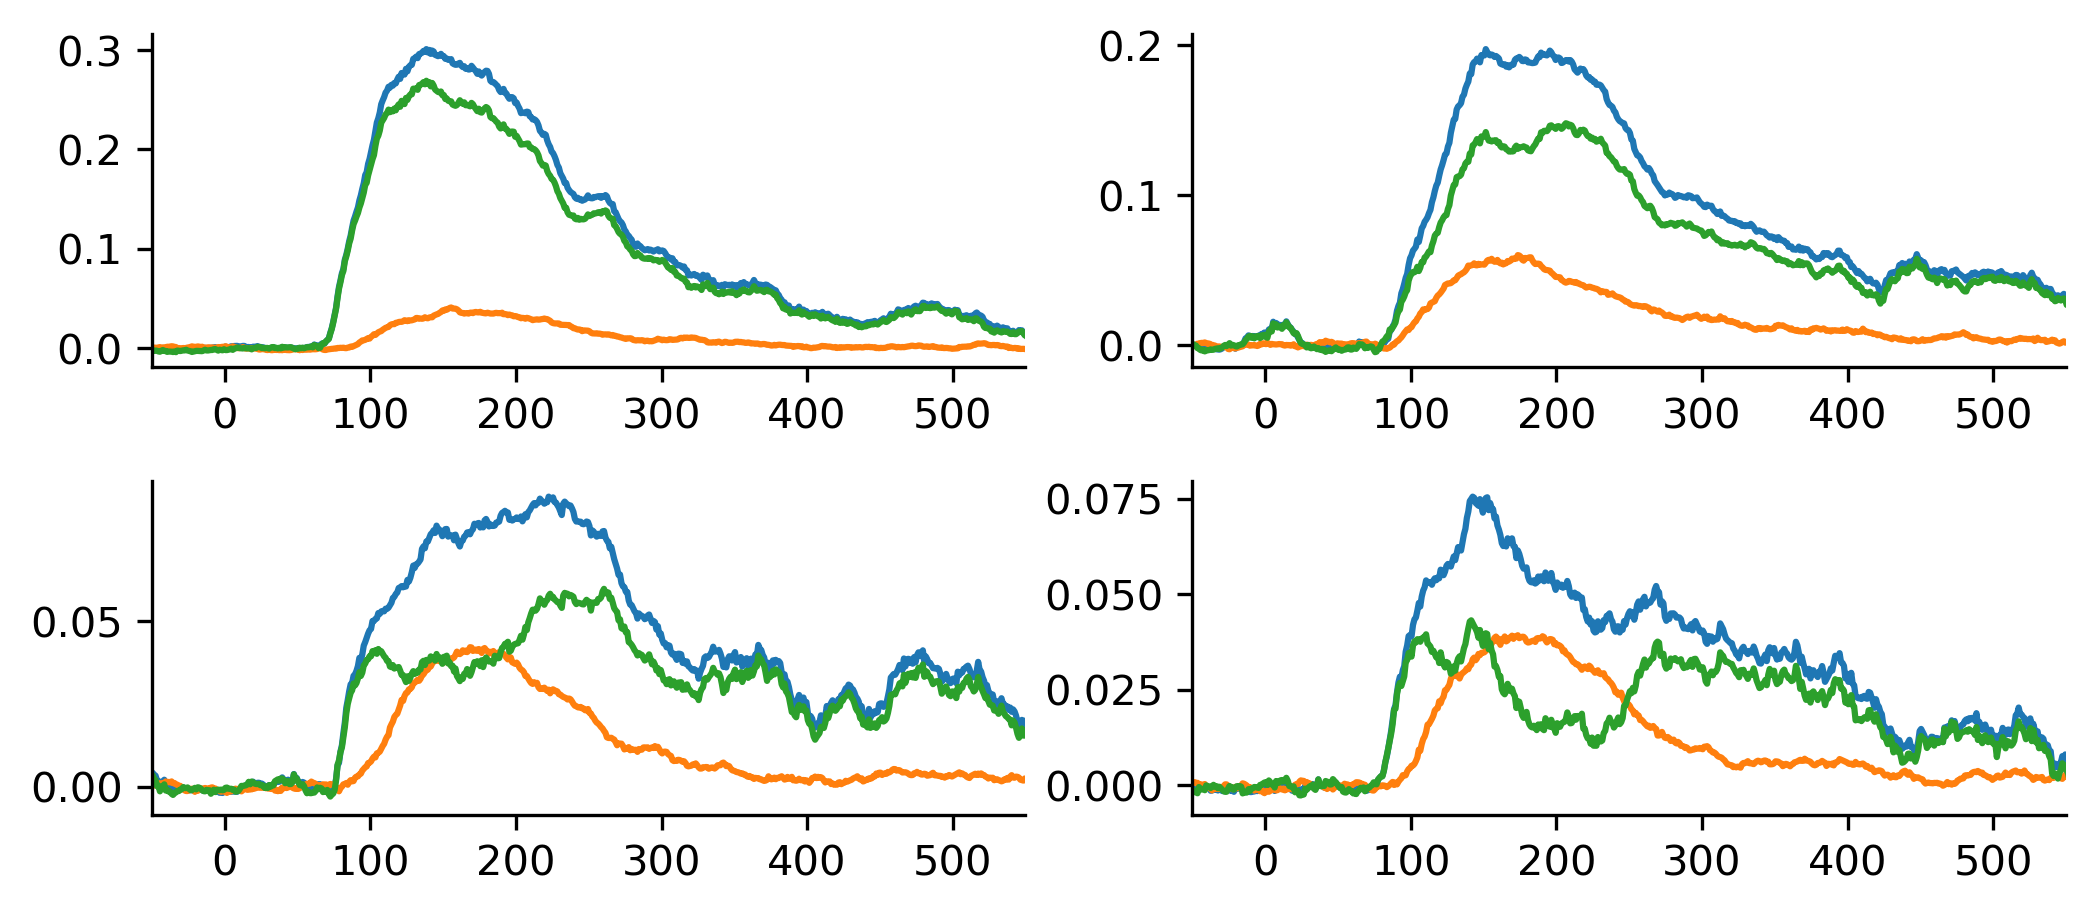

In [5]:
cm = 1 / 2.54
tim = np.arange(-200, 675) + 12.5
fig, axs = plt.subplots(2, 2, figsize=(18 * cm, 8 * cm), dpi=300, sharey=False)

for ax, cat in zip(axs.flat, ['fac', 'bod', 'art', 'nat']):
    ax.plot(tim, data['itc'][cat].mean(0) - data['itc'][cat].mean(0)[tim<0].mean())
    ax.plot(tim, data['itc'][cat+'0'].mean(0) - data['itc'][cat+'0'].mean(0)[tim<0].mean())
    ax.plot(tim, data['itc'][cat].mean(0) - data['itc'][cat+'0'].mean(0))

for ax in axs.flat:
    ax.set_xlim(-50, 550)

sns.despine()
fig.tight_layout()

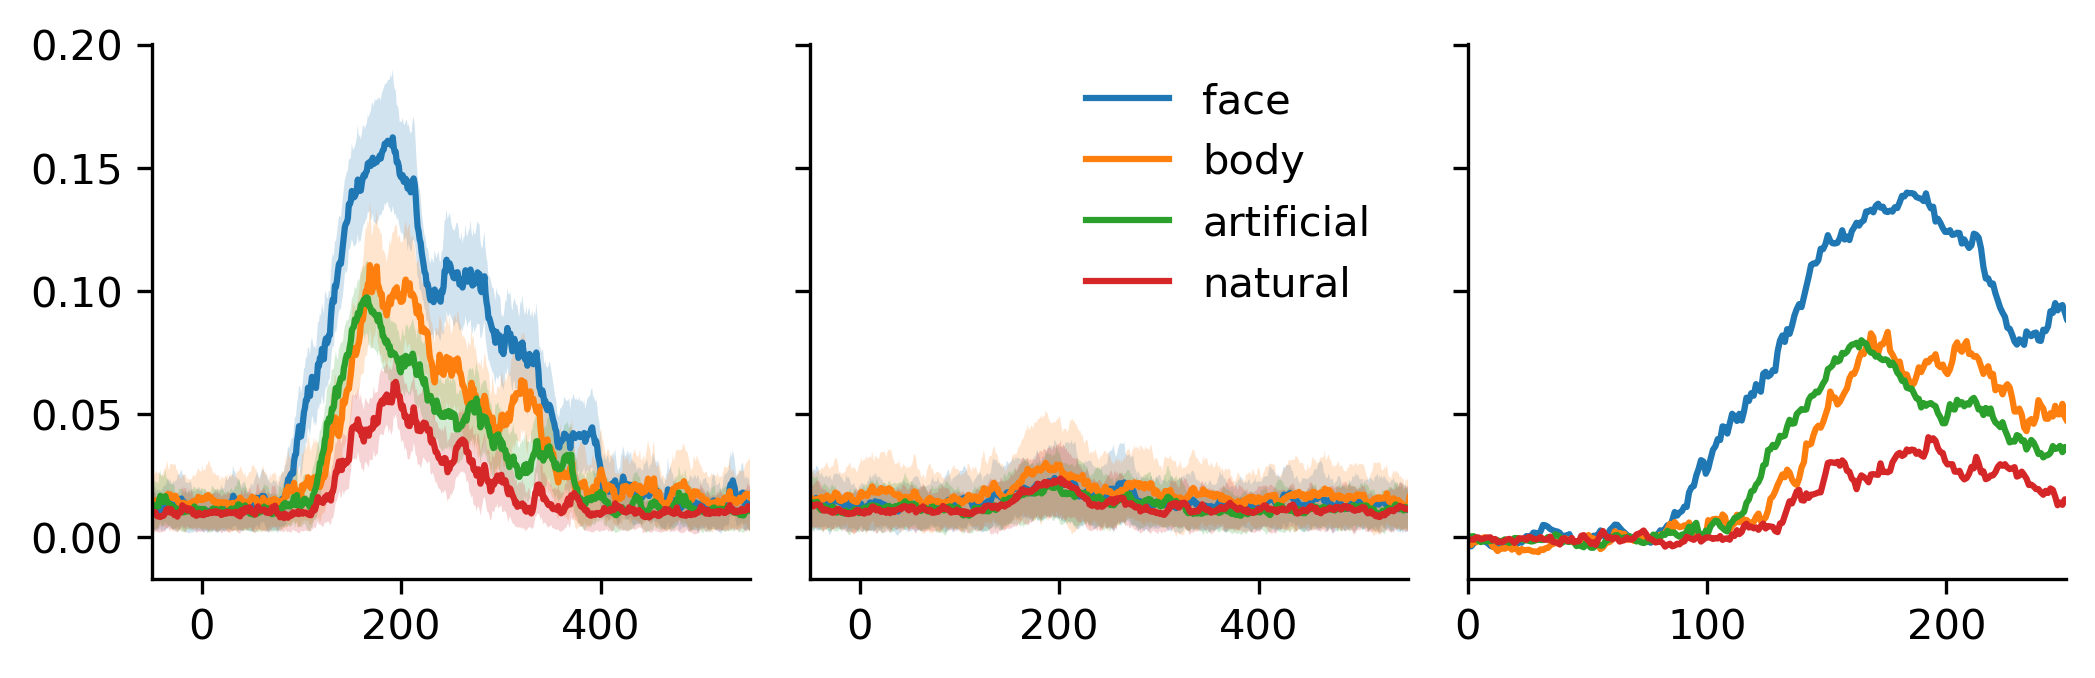

In [6]:
cm = 1 / 2.54
tim = np.arange(-200, 675) + 12.5
fig, axs = plt.subplots(1, 3, figsize=(18 * cm, 6 * cm), dpi=300, sharey=True)

region = 'pfc'
for category in ['fac', 'bod', 'art', 'nat']:
    m = np.array(data[region][category])
    m0 = np.array(data[region][category+"0"])
    
    axs[0].plot(tim, m.mean(0))
    axs[0].fill_between(tim, m.mean(0) + m.std(0), m.mean(0) - m.std(0), alpha=.2, label='_nolegend_')

    axs[1].plot(tim, m0.mean(0))
    axs[1].fill_between(tim, m0.mean(0) + m0.std(0), m0.mean(0) - m0.std(0), alpha=.2, label='_nolegend_')

    axs[2].plot(tim, m.mean(0) - m0.mean(0))

for ax in axs:
    ax.set_xlim(-50, 550)
axs[2].set_xlim(0, 250)
axs[1].legend(['face', 'body', 'artificial', 'natural'], frameon=False)
sns.despine()
fig.tight_layout()

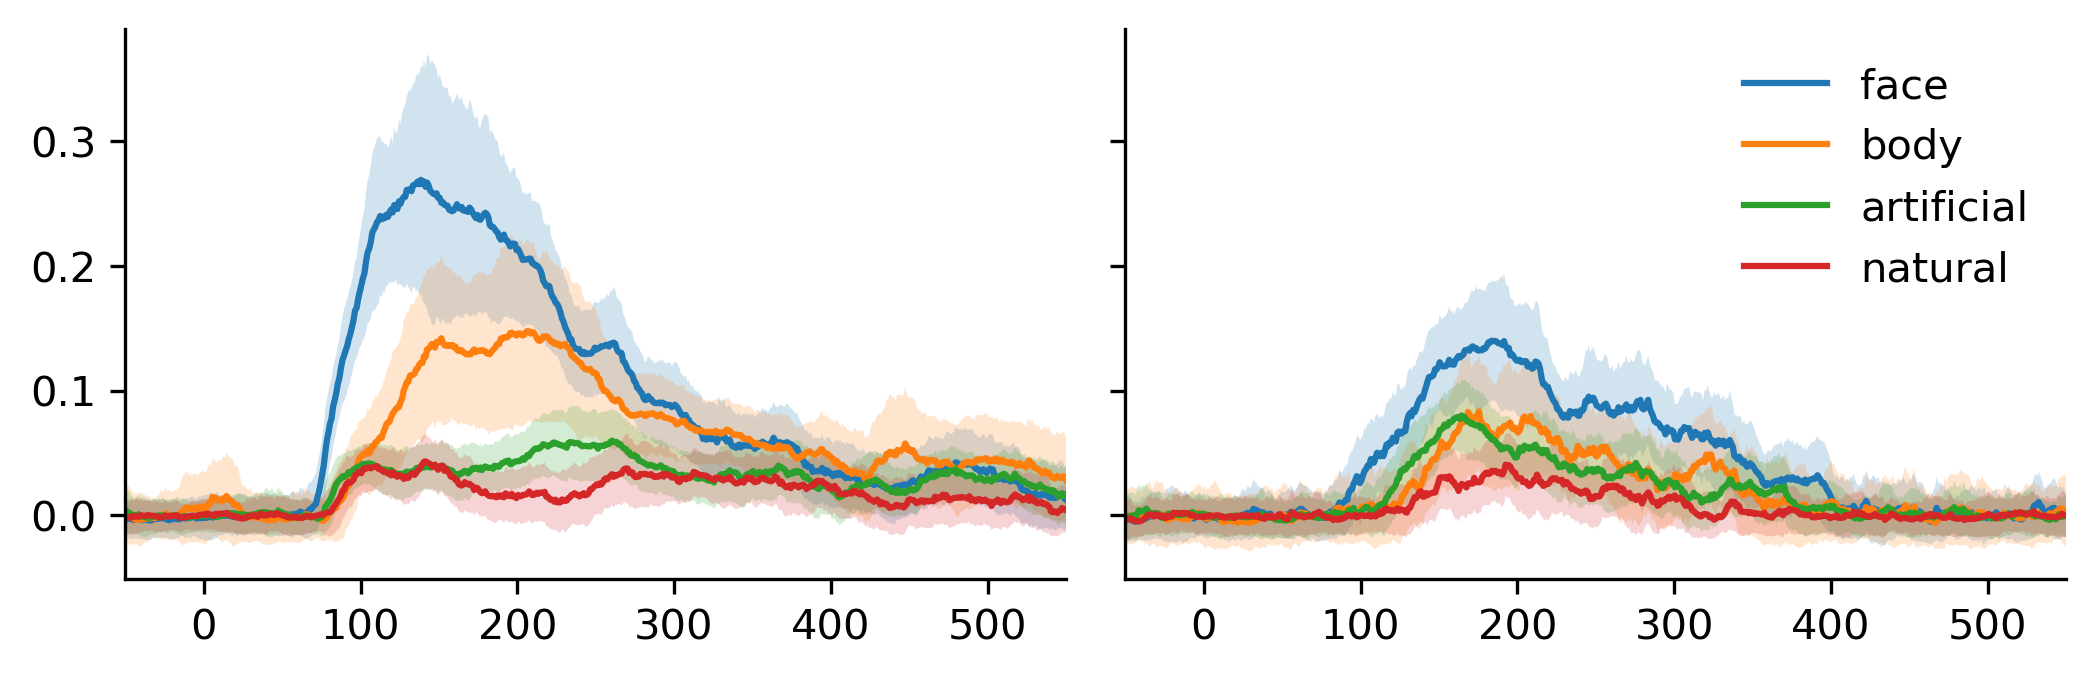

In [7]:
cm = 1 / 2.54
tim = np.arange(-200, 675) + 12.5
fig, axs = plt.subplots(1, 2, figsize=(18 * cm, 6 * cm), dpi=300, sharey=True)

for category in ['fac', 'bod', 'art', 'nat']:
    mi = data['itc'][category] - data['itc'][category+"0"].mean(0)
    mp = data['pfc'][category] - data['pfc'][category+"0"].mean(0)
    
    axs[0].plot(tim, mi.mean(0))
    axs[0].fill_between(tim, mi.mean(0) + 1.96 * mi.std(0), mi.mean(0) - 1.96 * mi.std(0), alpha=.2, label='_nolegend_')

    axs[1].plot(tim, mp.mean(0))
    axs[1].fill_between(tim, mp.mean(0) + 1.96 * mp.std(0), mp.mean(0) - 1.96 * mp.std(0), alpha=.2, label='_nolegend_')

for ax in axs:
    ax.set_xlim(-50, 550)
axs[1].legend(['face', 'body', 'artificial', 'natural'], frameon=False)
sns.despine()
fig.tight_layout()

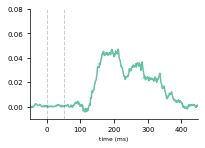

In [8]:
sns.set_palette("Set2")

cm = 1 / 2.54
tim = np.arange(-200, 675) + 12.5
fig, axs = plt.subplots(1, 1, figsize=(7.5 * cm, 5.5 * cm))
ax = axs

tmp = []
for category in ['fac', 'bod', 'art', 'nat']:
    tmp.append(data['pfc'][category].mean(0) - data['itc'][category+"0"].mean(0))

ax.plot(tim, np.mean(tmp, 0))
    # axs[0].fill_between(tim, mi.mean(0) + 1.96 * mi.std(0), mi.mean(0) - 1.96 * mi.std(0), alpha=.2, label='_nolegend_')
ax.set_xlim(-50, 550)
ax.axvline(0, color='k', ls='dashed', lw=1, alpha=.2, label='_nolegend_')
ax.axvline(50, color='k', ls='dashed', lw=1, alpha=.2, label='_nolegend_')
ax.set_xlim(-50, 450)
ax.set_ylim(-.01, .08)
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=7)
ax.set_xlabel('time (ms)', fontsize=6)
plt.setp(ax.spines.values(), linewidth=.7)

sns.despine()
fig.tight_layout()

# plt.savefig('G:\Codes\Article\IT-PFC\images\AI\dcs-avg-category.pdf')

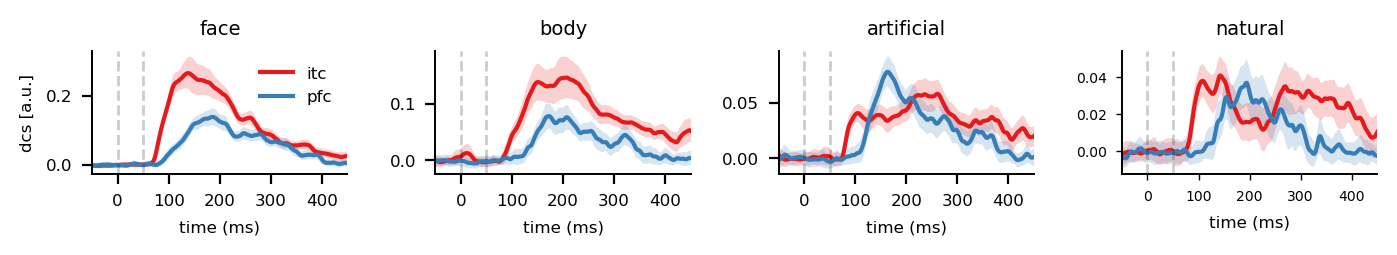

In [10]:
sns.set_palette('Set1')

mm = 1 / 25.4
tim = np.arange(-200, 675) + 12.5
fig, axs = plt.subplots(1, 4, figsize=(180 * mm, 35 * mm), dpi=200, sharey=False)
axs = axs.flatten()

for ax, category in zip(axs, ['fac', 'bod', 'art', 'nat']):
    mi = data['itc'][category] - data['itc'][category+"0"].mean(0)
    mp = data['pfc'][category] - data['pfc'][category+"0"].mean(0)

    # mi = data['itc'][category]
    # mp = data['pfc'][category]

    mi = smooth(mi, sigma=3)
    mp = smooth(mp, sigma=3)
    
    ax.plot(tim, mi.mean(0), label='itc')
    ax.fill_between(tim, mi.mean(0) + mi.std(0), mi.mean(0) - mi.std(0), alpha=.2, label='_nolegend_')

    ax.plot(tim, mp.mean(0), label='pfc')
    ax.fill_between(tim, mp.mean(0) + mp.std(0), mp.mean(0) - mp.std(0), alpha=.2, label='_nolegend_')

for ax, title in zip(axs.flat, ['face', 'body', 'artificial', 'natural']):
    ax.axvline(0, color='k', ls='dashed', lw=1, alpha=.2, label='_nolegend_')
    ax.axvline(50, color='k', ls='dashed', lw=1, alpha=.2, label='_nolegend_')
    ax.set_xlim(-50, 450)
    ax.set_ylabel('')
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.set_title(title, fontsize=7)
    ax.set_xlabel('time (ms)', fontsize=6)
    plt.setp(ax.spines.values(), linewidth=.7)

axs[0].legend(frameon=False, fontsize=6)
axs[0].set_ylabel('dcs [a.u.]', fontsize=6)
ax.tick_params(axis='both', which='major', labelsize=5, width=.5, length=2)
# axs[2].set_ylabel('dcs [a.u.]', fontsize=6)

sns.despine()
fig.tight_layout()

# plt.savefig('dcs-per-category.pdf')

In [11]:
def fonsets(tim, m, nsw: int=5):
    onsets = []
    
    bl = (tim < 10) & (tim >= -10)

    for rep in range(m.shape[0]):
        rm = m[rep, :]
        rm -= rm[bl].mean()

        maxv = rm[(tim > 50) & (tim < 250)].max()
        thresh = 0.15 * (maxv)
        ht = rm > thresh
        cht = np.convolve(ht, np.ones(nsw), 'same') == nsw

        cht[tim<60] = 0
        cht[tim>200] = 0
        ind = np.argwhere(cht)

        if len(ind)==0:
            onsets.extend([np.nan])
        else:
            onsets.extend(tim[ind[0] - nsw])
    return np.array(onsets)

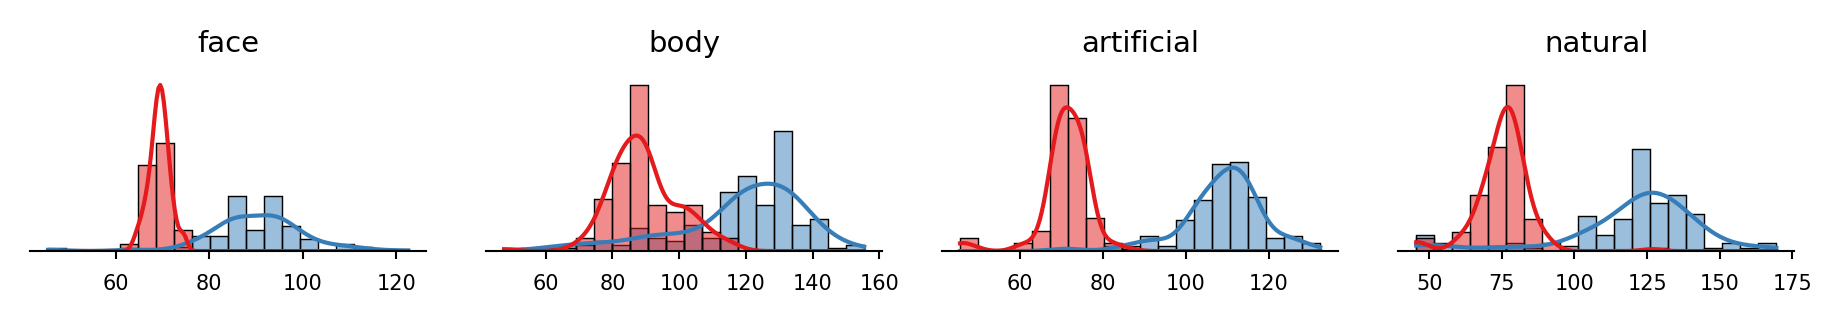

In [12]:
mm = 1 / 25.4
fig, axs = plt.subplots(1, 4, figsize=(157 * mm, 30 * mm), dpi=300, sharex=False, sharey=False)
axs = axs.flatten()

for ax, category in zip(axs, ['fac', 'bod', 'art', 'nat']):

      X_itc = data['itc'][category] - data['itc'][category+"0"].mean(0)
      X_pfc = data['pfc'][category] - data['pfc'][category+"0"].mean(0)

      nsw = 15

      itc_onsets = fonsets(tim, X_itc, nsw)
      pfc_onsets = fonsets(tim, X_pfc, nsw)

      df = {'onsets': np.concatenate([itc_onsets, pfc_onsets]),
            'region': np.concatenate([np.full(np.shape(itc_onsets), 'ITC', dtype=object), 
                  np.full(np.shape(pfc_onsets), 'PFC', dtype=object)])}

      h = sns.histplot(data=df, x='onsets', hue='region', ax=ax, element='bars', kde=True, bins=20, line_kws={'linewidth': 1})

for ax, title in zip(axs.flat, ['face', 'body', 'artificial', 'natural']):
      ax.set_ylabel('')
      ax.set_xlabel('')
      ax.set_yticks([])
      # ax.set_xticks([50, 75, 100, 125, 150])
      ax.legend([], frameon=False)
      ax.tick_params(axis='both', which='major', labelsize=5, width=.5, length=2)
      plt.setp(ax.spines.values(), linewidth=.5)
      ax.set_title(title, fontsize=7)

sns.despine(left=True)
fig.tight_layout()

plt.savefig('dcs-onsets.pdf')

In [13]:
from scipy import stats

tim = np.arange(-200, 675) + 12.5

onsets = {
    'itc': {'fac': [], 'bod': [], 'art': [], 'nat': []},
    'pfc': {'fac': [], 'bod': [], 'art': [], 'nat': []},
}
peak_times = {
    'itc': {'fac': [], 'bod': [], 'art': [], 'nat': []},
    'pfc': {'fac': [], 'bod': [], 'art': [], 'nat': []}
}

for rep in range(250):
    np.random.seed(rep)
    for region in ['itc', 'pfc']:
        for category in ['fac', 'bod', 'art', 'nat']:
            # ITC
            X = data[region][category] - data[region][category+"0"].mean(0)
            X = smooth(X, sigma=5)
            X = X[np.random.choice(X.shape[0], X.shape[0], replace=True)].mean(0)

            bl = X[(tim <= 0) & (tim > -150)]
            th = 3 * bl.std() + bl.mean()
            sw = np.convolve(X>th, .05*np.ones((1, 20)).flatten(), mode='same')
            sw[tim<0] = 0
            os = tim[np.argmax(sw)-10]
            if os < 250 and os > 30:
                tmp = X
                onsets[region][category].append(os)
            else:
                onsets[region][category].append(np.nan)
            pt = tim[np.argmax(X)]
            if pt < 350 and pt > 30:
                peak_times[region][category].append(pt)
            else:
                peak_times[region][category].append(np.nan)

In [14]:
import pandas as pd

n = len(onsets['itc']['fac'])
df = pd.DataFrame({
    'times': np.concatenate((onsets['itc']['fac'], onsets['itc']['bod'], onsets['itc']['art'], onsets['itc']['nat'], 
                             onsets['pfc']['fac'], onsets['pfc']['bod'], onsets['pfc']['art'], onsets['pfc']['nat'],
                             peak_times['itc']['fac'], peak_times['itc']['bod'], peak_times['itc']['art'], peak_times['itc']['nat'],
                             peak_times['pfc']['fac'], peak_times['pfc']['bod'], peak_times['pfc']['art'], peak_times['pfc']['nat'])),
    'region': np.concatenate((np.full(4*n, 'ITC', dtype=object), np.full(4*n, 'PFC', dtype=object), 
                              np.full(4*n, 'ITC', dtype=object), np.full(4*n, 'PFC', dtype=object))),
    'category': np.concatenate((np.full(n, 'fac', dtype=object), np.full(n, 'bod', dtype=object), np.full(n, 'art', dtype=object), np.full(n, 'nat', dtype=object),
                                np.full(n, 'fac', dtype=object), np.full(n, 'bod', dtype=object), np.full(n, 'art', dtype=object), np.full(n, 'nat', dtype=object),
                                np.full(n, 'fac', dtype=object), np.full(n, 'bod', dtype=object), np.full(n, 'art', dtype=object), np.full(n, 'nat', dtype=object),
                                np.full(n, 'fac', dtype=object), np.full(n, 'bod', dtype=object), np.full(n, 'art', dtype=object), np.full(n, 'nat', dtype=object))),
    'type': np.concatenate((np.full(8*n, 'onset', dtype=object), np.full(8*n, 'peak', dtype=object)))
})
df.head()

,times,region,category,type
0,57.5,ITC,fac,onset
1,55.5,ITC,fac,onset
2,55.5,ITC,fac,onset
3,53.5,ITC,fac,onset
4,59.5,ITC,fac,onset


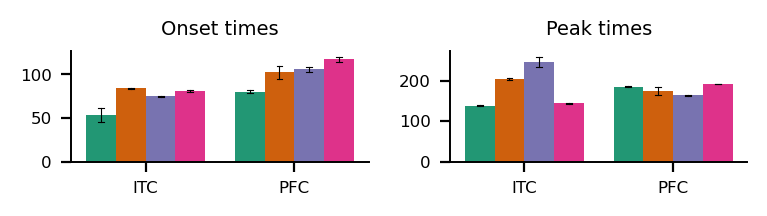

In [15]:
# sns.set_palette("tab10")

fg = sns.FacetGrid(data=df, col="type", sharey=False)
fg.figure.set_size_inches((10*cm, 3*cm))
fg.figure.set_dpi(200)
fg.map_dataframe(sns.barplot, y="times", x="region", hue="category", errorbar='sd', \
    palette='Dark2', errwidth=.4, errcolor='k', capsize=.04, saturation=.9)
# sns.barplot(y="times", x="region", hue="category", data=df, ci='sd', group='type')

for ax, title in zip(fg.axes.flat, ["Onset times", "Peak times"]):
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.set_title(title, fontsize=7)
    # ax.set_xlabel(ax.get_xlabel(), fontsize=6)
    ax.set_xlabel("")
    ax.set_ylabel("")
    plt.setp(ax.spines.values(), linewidth=.7)

# fg.axes[0, 0].set_ylim(40, 100)
# fg.axes.set_ylim(40, 300)

fg.fig.tight_layout()
# plt.savefig('dcs-onsets-bar.pdf')

In [31]:
from scipy.stats import norm

reported_time = "peak"
print(reported_time)
print("")
for category in ["fac", "bod", "art", "nat"]:
    print(category)

    gi = df[(df.region=="ITC").values & (df.category==category).values & (df.type==reported_time).values].times.values
    gp = df[(df.region=="PFC").values & (df.category==category).values & (df.type==reported_time).values].times.values

    gi = gi[~np.isnan(gi)]
    gp = gp[~np.isnan(gp)]

    print(f"itc = {gi.mean():.0f} +- {gi.std():.0f}")
    print(f"pfc = {gp.mean():.0f} +- {gp.std():.0f}")
    print(f"dt = {gp.mean() - gi.mean():.0f}")
    p = norm.cdf((gi.mean() - gp.mean()) / gp.std())
    print(f"p = {p:.9f}")

    print("")

peak

fac
itc = 138 +- 1
pfc = 185 +- 1
dt = 47
p = 0.000000000

bod
itc = 204 +- 2
pfc = 174 +- 9
dt = -30
p = 0.999451240

art
itc = 246 +- 13
pfc = 164 +- 1
dt = -83
p = 1.000000000

nat
itc = 144 +- 1
pfc = 192 +- 1
dt = 48
p = 0.000000000



In [29]:
gi

array([80.5, 82.5, 81.5, 79.5, 81.5, 81.5, 81.5, 79.5, 80.5, 80.5, 80.5,
       82.5, 80.5, 81.5, 79.5, 80.5, 80.5, 81.5, 81.5, 81.5, 79.5, 80.5,
       80.5, 82.5, 80.5, 80.5, 82.5, 79.5, 81.5, 80.5, 80.5, 81.5, 82.5,
       81.5, 81.5, 81.5, 80.5, 80.5, 82.5, 79.5, 81.5, 81.5, 80.5, 80.5,
       80.5, 81.5, 81.5, 80.5, 81.5, 82.5, 82.5, 80.5, 81.5, 79.5, 80.5,
       81.5, 80.5, 80.5, 81.5, 81.5, 81.5, 80.5, 80.5, 80.5, 80.5, 81.5,
       81.5, 81.5, 81.5, 80.5, 81.5, 81.5, 80.5, 82.5, 80.5, 81.5, 80.5,
       81.5, 80.5, 79.5, 80.5, 81.5, 80.5, 79.5, 80.5, 80.5, 81.5, 80.5,
       80.5, 82.5, 81.5, 81.5, 81.5, 80.5, 81.5, 80.5, 80.5, 81.5, 81.5,
       79.5, 80.5, 80.5, 81.5, 80.5, 81.5, 80.5, 79.5, 82.5, 79.5, 81.5,
       81.5, 79.5, 79.5, 82.5, 81.5, 80.5, 80.5, 81.5, 81.5, 81.5, 78.5,
       81.5, 81.5, 80.5, 81.5, 79.5, 81.5, 81.5, 82.5, 81.5, 79.5, 82.5,
       80.5, 81.5, 79.5, 81.5, 80.5, 81.5, 80.5, 80.5, 80.5, 80.5, 81.5,
       81.5, 82.5, 82.5, 80.5, 80.5, 80.5, 81.5, 81

In [76]:
category = 'nat'

x1 = df[(df.region=='ITC') & (df.category==category) & (df.type=='onset')].times.to_numpy()
x2 = df[(df.region=='PFC') & (df.category==category) & (df.type=='onset')].times.to_numpy()

x1 = x1[~np.isnan(x1)]
x2 = x2[~np.isnan(x2)]

print(x1.shape)
print(x2.shape)

print(x2.mean() - x1.mean())

print(f"p-value for {category}: {1 - np.mean(((x2 - x1.reshape(-1, 1)) > 0))}")

(250,)
(250,)
36.33200000000001
p-value for nat: 0.0


In [59]:
import pandas as pd

for iter, category in enumerate(['fac', 'bod', 'art', 'nat']):

    X_itc = data['itc'][category] - data['itc'][category+"0"].mean(0)
    X_pfc = data['pfc'][category] - data['pfc'][category+"0"].mean(0)

    nsw = 15

    itc_onsets = fonsets(tim, X_itc, nsw)
    pfc_onsets = fonsets(tim, X_pfc, nsw)

    if iter==0:
        df = pd.DataFrame(
            {'onsets': np.concatenate([itc_onsets, pfc_onsets]),
             'region': np.concatenate([np.full(np.shape(itc_onsets), 'ITC', dtype=object), 
                                       np.full(np.shape(pfc_onsets), 'PFC', dtype=object)]),
             'category': category})
    else:
        _df = pd.DataFrame({
            'onsets': np.concatenate([itc_onsets, pfc_onsets]),
            'region': np.concatenate([np.full(np.shape(itc_onsets), 'ITC', dtype=object), 
                                      np.full(np.shape(pfc_onsets), 'PFC', dtype=object)]),
            'category': category})
        df = pd.concat((df, _df), ignore_index=True)

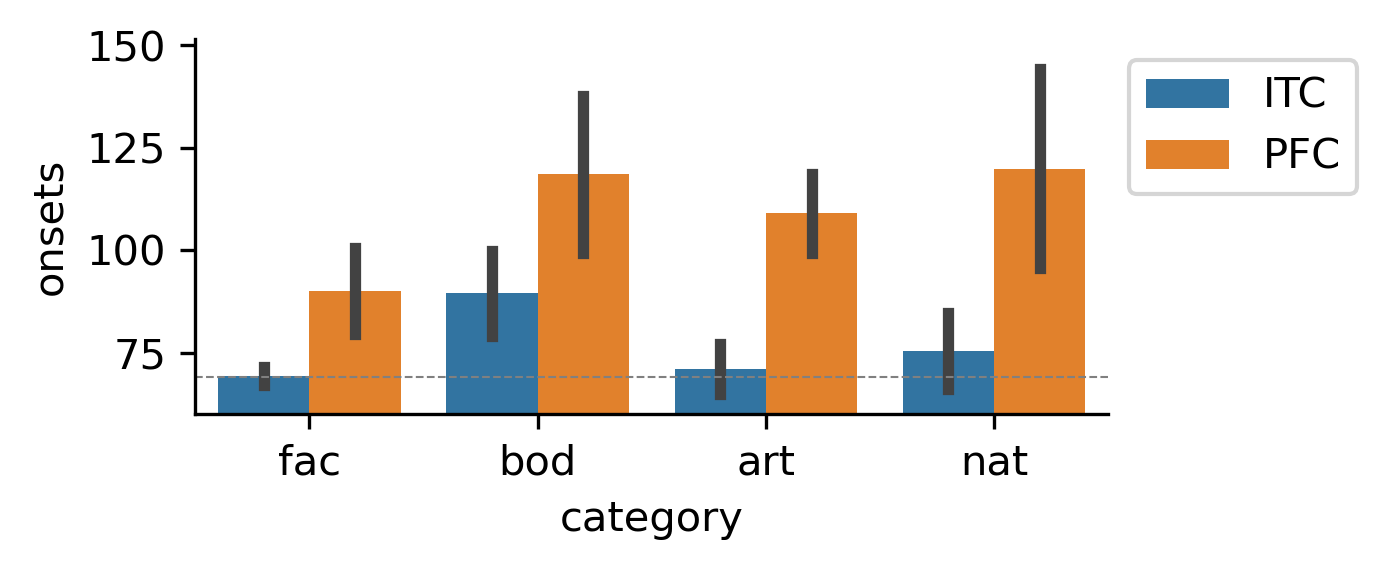

In [54]:
cm = 1 / 2.54
fig, axs = plt.subplots(1, 1, figsize=(12 * cm, 5 * cm), dpi=300)

barplot = sns.barplot(data=df, x='category', y='onsets', hue='region', errorbar='sd')
barplot.legend (bbox_to_anchor = (1, 1))
axs.axhline(69, c='gray', ls='--', lw=.5)
axs.set_ylim(60, axs.get_ylim()[1])
sns.despine()
fig.tight_layout()

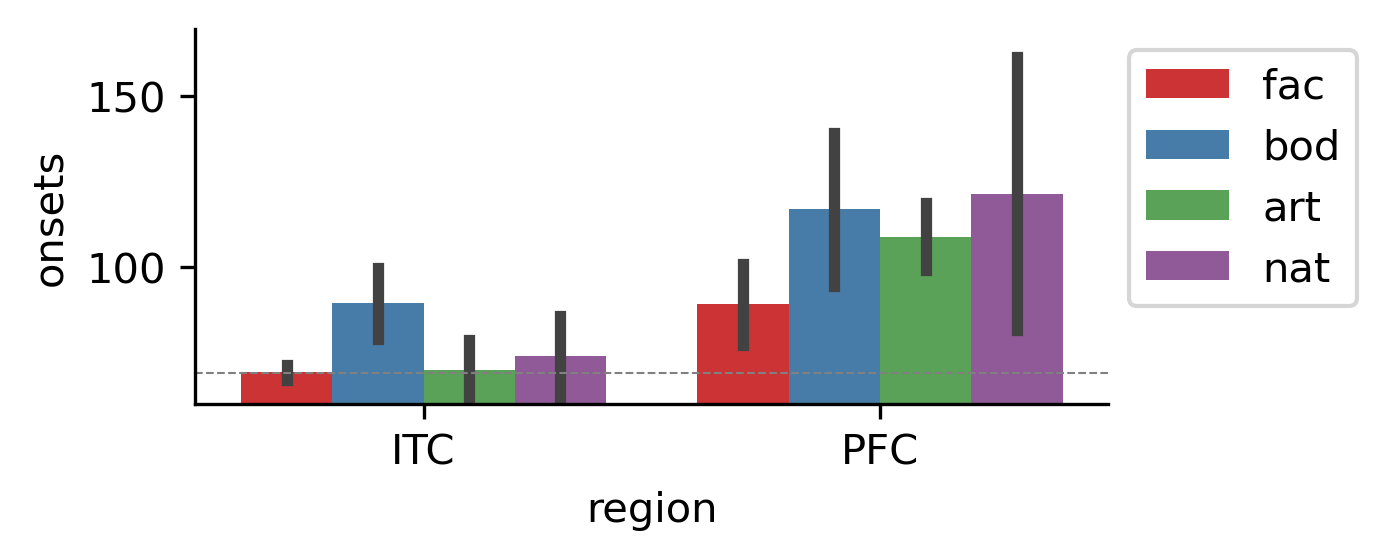

In [29]:
cm = 1 / 2.54
fig, axs = plt.subplots(1, 1, figsize=(12 * cm, 5 * cm), dpi=300)

barplot = sns.barplot(data=df, hue='category', y='onsets', x='region', errorbar='sd')
barplot.legend (bbox_to_anchor = (1, 1))
axs.axhline(69, c='gray', ls='--', lw=.5)
axs.set_ylim(60, axs.get_ylim()[1])
sns.despine()
fig.tight_layout()

In [56]:
category = 'fac'

x1 = df[(df.region=='ITC') & (df.category==category)].onsets.to_numpy()
x2 = df[(df.region=='PFC') & (df.category==category)].onsets.to_numpy()

x1 = x1[~np.isnan(x1)]
x2 = x2[~np.isnan(x2)]


print(f"p-value for {category}: {1 - np.mean(((x2 - x1.reshape(-1, 1)) > 0))}")

p-value for fac: 0.027511111111111153


In [58]:
x2.shape

(150,)

In [31]:
category1 = 'art'
category2 = 'fac'
region = 'ITC'


x1 = df[(df.region==region) & (df.category==category1)].onsets.to_numpy()
x2 = df[(df.region==region) & (df.category==category2)].onsets.to_numpy()

print(f"p-value for {category2} > {category1}: {1 - np.mean(((x2 - x1.reshape(-1, 1)) > 0))} ({region})")

p-value for fac > art: 0.7223111111111111 (ITC)


# Accuracy

In [3]:
from tqdm.notebook import tqdm

data_a = {'itc': {'fac': [], 'bod': [], 'art': [], 'nat': [], 'fac0': [], 'bod0': [], 'art0': [], 'nat0': []},
        'pfc': {'fac': [], 'bod': [], 'art': [], 'nat': [], 'fac0': [], 'bod0': [], 'art0': [], 'nat0': []}}

for fname in tqdm(glob('G:\Results\SUA\dec\c-ovr-final\classification\c-ovr-r-*-cfn.pickle')):
    with open(fname, 'rb') as handler:
        dxt = pickle.load(handler)

    for region in ['itc', 'pfc']:
        for category in ['fac', 'bod', 'art', 'nat']:
            X = np.array(dxt[region][category])
            Z = X.diagonal(axis1=2, axis2=3).sum(2) / X.sum((2, 3))
            data_a[region][category].append(Z.mean(0))

for fname in tqdm(glob('G:\Results\SUA\dec\c-ovr-final\classification\c-ovr-p-*-cfn.pickle')):
    with open(fname, 'rb') as handler:
        dxt = pickle.load(handler)

    for region in ['itc', 'pfc']:
        for category in ['fac', 'bod', 'art', 'nat']:
            X = np.array(dxt[region][category])
            Z = X.diagonal(axis1=2, axis2=3).sum(2) / X.sum((2, 3))
            data_a[region][category+"0"].append(Z.mean(0))

for region in ['itc', 'pfc']:
    for key in data_a[region].keys():
        data_a[region][key] = np.array(data_a[region][key])

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


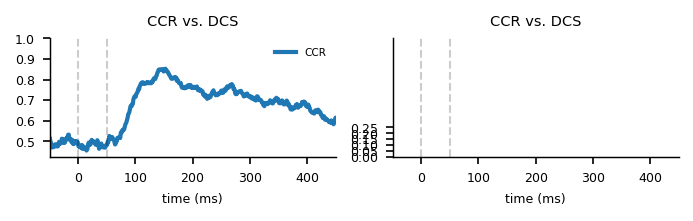

In [11]:
cm = 1 / 2.54
tim = np.arange(-200, 675, step=1) + 12.5
fig, axs = plt.subplots(1, 2, figsize=(12 * cm, 4 * cm), dpi=150, sharey=False, sharex=False, squeeze=False)
axs = axs.flatten()

category = 'nat'
Z = data_a['itc'][category]
# Z = Z - Z.mean(0)[(tim<0) & (tim>=-10)].mean()
axs[0].plot(tim, Z.mean(0), lw=2, label="CCR")

# Z = data['itc'][category] - data['itc'][category+"0"].mean(0)
# Z = Z - Z.mean(0)[(tim<0) & (tim>=-10)].mean()
# axs[1].plot(tim, Z.mean(0), lw=2, label="DCS")

for ax in axs:
    ax.axvline(0, color='k', ls='dashed', lw=1, alpha=.2, label='_nolegend_')
    ax.axvline(50, color='k', ls='dashed', lw=1, alpha=.2, label='_nolegend_')
    ax.set_title("ITC, Face")
    ax.set_xlim(-50, 450)
    ax.tick_params(axis='both', which='major', labelsize=6)
    # ax.set_ylabel('')
    ax.set_title("CCR vs. DCS", fontsize=7)
    ax.set_xlabel('time (ms)', fontsize=6)
    plt.setp(ax.spines.values(), linewidth=.7)
    ax.legend(frameon=False, fontsize=5)
sns.despine()
fig.tight_layout()

axs[0].set_yticks([.5, .6, .7, .8, .9, 1.0])
axs[1].set_yticks([0, 0.05, 0.1, 0.15, 0.2,0.25])

plt.savefig("ccr_vs_dcs.pdf")

In [12]:
Z = data['itc'][category] - data['itc'][category+"0"].mean(0)

plt.plot(Z.mean(0))

NameError: name 'data' is not defined

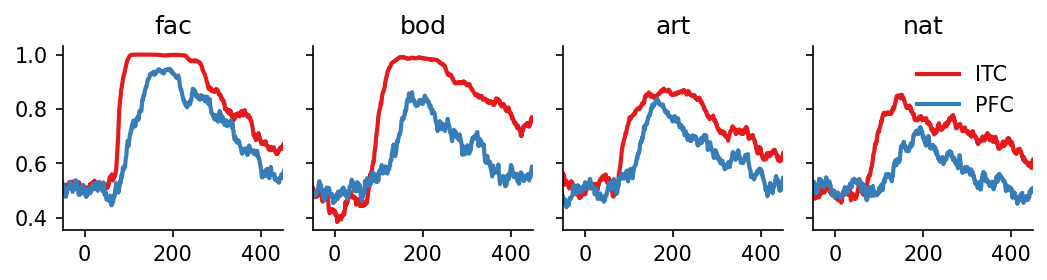

In [97]:
cm = 1 / 2.54
tim = np.arange(-200, 675, step=1) + 12.5
fig, axs = plt.subplots(1, 4, figsize=(18 * cm, 5 * cm), dpi=150, sharey=True, sharex=True, squeeze=False)
axs = axs.flatten()

for ax, category in zip(axs[:4], ['fac', 'bod', 'art', 'nat']):
    Z = data_a['itc'][category]
    Z0 = data_a['itc'][category+"0"]
    ax.plot(tim, Z.mean(0), lw=2, label="ITC")

    Z = data_a['pfc'][category]
    Z0 = data_a['pfc'][category+"0"]
    ax.plot(tim, Z.mean(0), lw=2, label="PFC")

    ax.set_title(category)
    ax.set_xlim(-50, 450)

axs[-1].legend(frameon=False)
sns.despine()
fig.tight_layout()

NameError: name 'data' is not defined

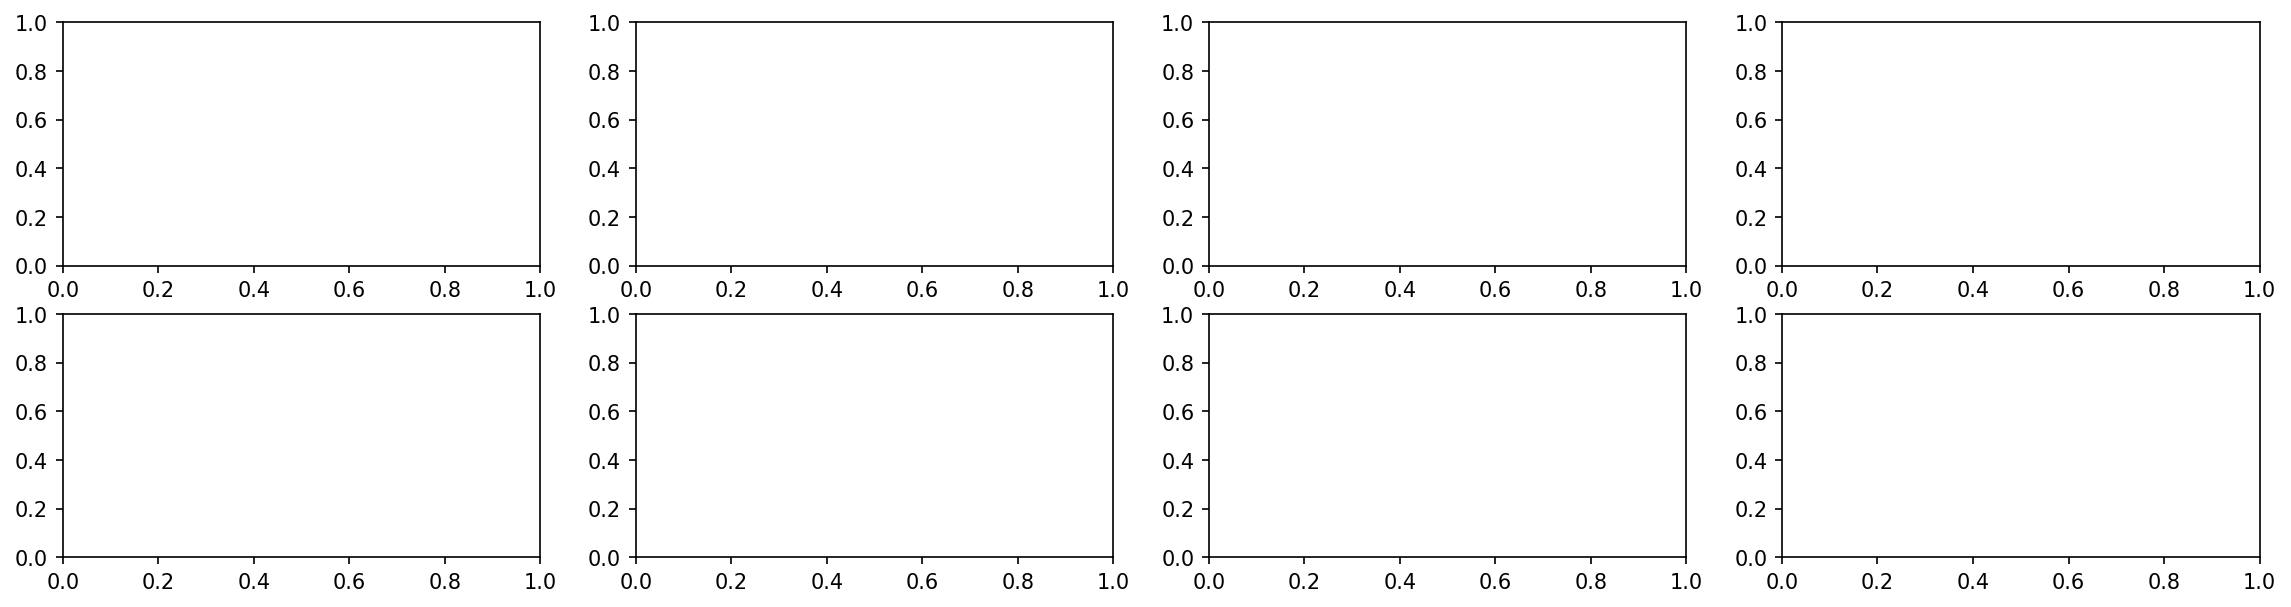

In [7]:
cm = 1 / 2.54
fig, axs = plt.subplots(2, 4, figsize=(48 * cm, 12 * cm), dpi=150)
axs = axs.flatten()

for ax, category in zip(axs[:4], ['fac', 'bod', 'art', 'nat']):
    # X = data['itc'][category]
    # Y = data_a['itc'][category]
    # X = data['itc'][f'{category}0']
    # Y = data_a['itc'][f'{category}0']
    # df = pd.DataFrame({'tim': np.tile(tim, (100, 1)).flatten(), 'dcs': X.flatten(), 'acc':Y.flatten()})
    X = data['itc'][category] - data['itc'][f'{category}0'].mean(0)
    Y = data_a['itc'][category] - data_a['itc'][f'{category}0'].mean(0)
    df = pd.DataFrame({'tim': np.tile(tim, (150, 1)).flatten(), 'dcs': X.flatten(), 'acc':Y.flatten()})
    sns.lineplot(data=df, x='tim', y='dcs', ax=ax, ci=None, lw=4)
    sns.lineplot(data=df, x='tim', y='acc', ax=ax.twinx(), ci=None, color='r', lw=4)
    
# for ax in axs[:4]:
#     ax.twinx().set_yticks([])
#     ax.set_yticks([])

for ax, category in zip(axs[4:], ['fac', 'bod', 'art', 'nat']):
    # X = data['pfc'][category]
    # Y = data_a['pfc'][category]
    # X = data['pfc'][f'{category}0']
    # Y = data_a['pfc'][f'{category}0']
    # df = pd.DataFrame({'tim': np.tile(tim, (100, 1)).flatten(), 'dcs': X.flatten(), 'acc':Y.flatten()})
    X = data['pfc'][category] - data['pfc'][f'{category}0'].mean(0)
    Y = data_a['pfc'][category] - data_a['pfc'][f'{category}0'].mean(0)
    df = pd.DataFrame({'tim': np.tile(tim, (150, 1)).flatten(), 'dcs': X.flatten(), 'acc':Y.flatten()})
    sns.lineplot(data=df, x='tim', y='dcs', ax=ax, ci=None, lw=4)
    sns.lineplot(data=df, x='tim', y='acc', ax=ax.twinx(), ci=None, color='r', lw=4)

# g.legend(handles=[Line2D([], [], marker='_', color="g", label='column1'), Line2D([], [], marker='_', color="b", label='column2')])

# sns.despine(right=False)
fig.tight_layout()